In [7]:
from cutmix_keras import CutMixImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import tensorflow as tf

In [8]:
local_zip = 'jajanan_indonesia_final.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./')
zip_ref.close()

In [9]:
base_dir = './jajanan_indonesia_final'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 64

def train_val_generators(dir_train, dir_validation, dir_test):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                       rotation_range=40,
                                       width_shift_range=.2,
                                       height_shift_range=.2,
                                       shear_range=.2,
                                       zoom_range=.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    train_generator1 = train_datagen.flow_from_directory(dir_train, batch_size=16, 
                                                        class_mode = 'categorical', 
                                                        seed=100, shuffle=True,
                                                        target_size=(64, 64))
    train_generator2 = train_datagen.flow_from_directory(dir_train, batch_size=16, 
                                                        class_mode = 'categorical', 
                                                        seed=100, shuffle=True,
                                                        target_size=(64, 64))
    train_generator = CutMixImageDataGenerator(
    generator1=train_generator1,
    generator2=train_generator2,
    img_size=IMG_SIZE,
    batch_size=16)
    
    validation_datagen = ImageDataGenerator(rescale = 1./255.)
    validation_generator = validation_datagen.flow_from_directory(dir_validation, batch_size=16,
                                                                  class_mode = 'categorical', target_size=(64, 64))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_generator = test_datagen.flow_from_directory(dir_test, batch_size=16,
                                                      class_mode='categorical', target_size=(64,64))
    
    return train_generator, validation_generator, test_generator

In [11]:
train_generator, validation_generator, test_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 678 images belonging to 8 classes.
Found 678 images belonging to 8 classes.
Found 155 images belonging to 8 classes.
Found 138 images belonging to 8 classes.


In [12]:
from tensorflow.keras.optimizers import RMSprop, Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer=Adam(lr=0.0001), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                  

In [13]:
history = model.fit(train_generator, 
                    epochs=10, 
                    shuffle=True,
                    steps_per_epoch = 64,
                    validation_data = validation_generator, 
                    verbose = 1)

Epoch 1/10



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=4

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'

64/64 [==============================] - 40s 613ms/step - loss: 1.7116 - accuracy: 0.3185 - val_loss: 1.4151 - val_accuracy: 0.4581
Epoch 2/10
64/64 [==============================] - 40s 619ms/step - loss: 1.1469 - accuracy: 0.5503 - val_loss: 1.1874 - val_accuracy: 0.5484
Epoch 3/10
64/64 [==============================] - 39s 622ms/step - loss: 0.9268 - accuracy: 0.6484 - val_loss: 1.0403 - val_accuracy: 0.6000
Epoch 4/10
64/64 [==============================] - 39s 609ms/step - loss: 0.8369 - accuracy: 0.6775 - val_loss: 1.1732 - val_accuracy: 0.5742
Epoch 5/10
64/64 [==============================] - 39s 611ms/step - loss: 0.7889 - accuracy: 0.6803 - val_loss: 0.8873 - val_accuracy: 0.6645
Epoch 6/10
64/64 [==============================] - 40s 623ms/step - loss: 0.7242 - accuracy: 0.7022 - val_loss: 0.8084 - val_accuracy: 0.7161
Epoch 7/10
64/64 [==============================] - 39s 609ms/step - loss: 0.7209 - accuracy: 0.7171 - val_loss: 0.8882 - val_accuracy: 0.6968
Epoch 8/10

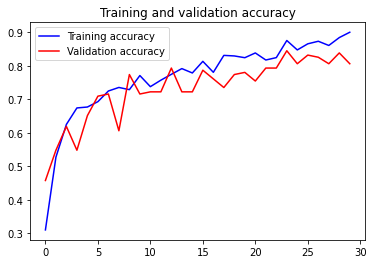

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()